In [1]:
#@title pip install and import
import numpy as np
import math
import time
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [6]:
test = pd.read_csv("test_topix_sp10.csv",index_col=0)
test = test.iloc[:,0:10]
on = pd.read_csv("on-policy-sp10.csv",index_col=0)
off = pd.read_csv("off-policy-sp10.csv",index_col=0)

In [8]:
return_stocks = test.pct_change()

portfolio_weights_on = on.to_numpy()
return_stocks_on = np.sum(return_stocks.multiply(portfolio_weights_on),axis=1)
Cumulative_returns_daily_drl_on = pd.DataFrame((1+return_stocks_on).cumprod())
Cumulative_returns_daily_drl_on.index=pd.to_datetime(Cumulative_returns_daily_drl_on.index)

portfolio_weights_off = off.to_numpy()
return_stocks_off = np.sum(return_stocks.multiply(portfolio_weights_off),axis=1)
Cumulative_returns_daily_drl_off = pd.DataFrame((1+return_stocks_off).cumprod())
Cumulative_returns_daily_drl_off.index=pd.to_datetime(Cumulative_returns_daily_drl_off.index)

In [9]:
rebalance_period = 1

/var/folders/mz/k5cvq67n1cdd51htpfqt0wbh0000gn/T/ipykernel_23188/1930368440.py:6: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


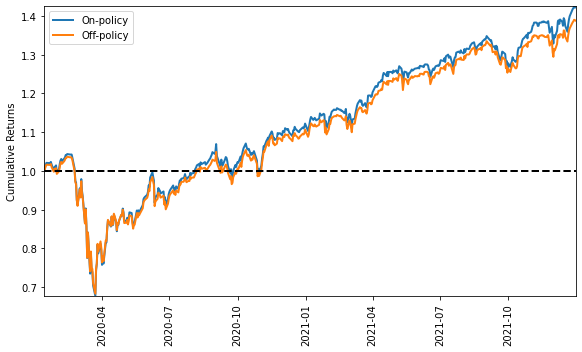

In [10]:
fig, ax = plt.subplots(figsize=(8,5),constrained_layout=True)
ax.plot(Cumulative_returns_daily_drl_on, label='On-policy', linewidth =2.0)
ax.plot(Cumulative_returns_daily_drl_off, label='Off-policy', linewidth =2.0)
ax.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.xticks(rotation=90)
plt.tight_layout()
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylabel("Cumulative Returns")
ax.legend()

In [11]:
on.columns

Index(['^SP500-15', '^SP500-20', '^SP500-25', '^SP500-30', '^SP500-35',
       '^SP500-40', '^SP500-45', '^SP500-50', '^SP500-55', '^SP500-60'],
      dtype='object')

Text(0, 0.5, 'On-policy Weights (%)')

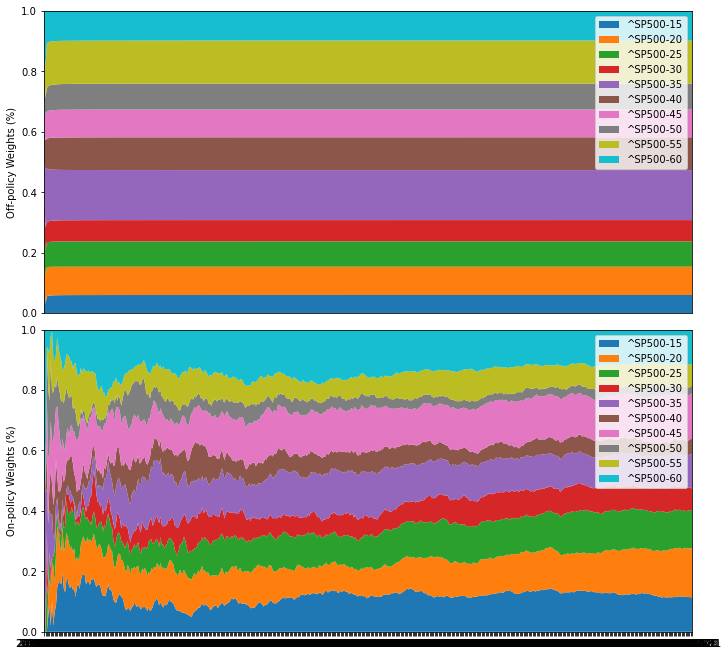

In [13]:

off.index=pd.to_datetime(off.index)
on.index=pd.to_datetime(on.index)
fig, (ax1,ax0) = plt.subplots(2,1,figsize=(10,9),constrained_layout=True)
#ax1.stackplot(test.index, off['AAPL'], off['MSFT'], off["AMZN"], off["GOOGL"], off["V"], off["UNH"], off["JNJ"], off["NVDA"],off["XOM"],off["PG"] ,labels=off.columns)
#ax1.stackplot(test.index, off['AAPL'], off['MSFT'], off["AMZN"], off["GOOGL"], off["GOOG"] ,labels=off.columns)
ax1.stackplot(test.index, off["^SP500-15"], off["^SP500-20"], off["^SP500-25"], off["^SP500-30"], off["^SP500-35"], off["^SP500-40"], off["^SP500-45"], off["^SP500-50"],off["^SP500-55"],off["^SP500-60"] ,labels=off.columns)
ax1.legend(loc='upper right')
ax1.margins(x=0)
ax1.margins(y=0)
ax1.xaxis.set_visible(False)
ax1.set_ylabel("Off-policy Weights (%)")
# ax0.stackplot(test.index, on['AAPL'], on['MSFT'], on["AMZN"], on["GOOGL"], on["GOOG"],labels=on.columns)
#ax0.stackplot(test.index, on['AAPL'], on['MSFT'], on["AMZN"], on["GOOGL"], on["V"], on["UNH"], on["JNJ"], on["NVDA"],on["XOM"],on["PG"] ,labels=on.columns)
ax0.stackplot(test.index, on["^SP500-15"], on["^SP500-20"], on["^SP500-25"], on["^SP500-30"], on["^SP500-35"], on["^SP500-40"], on["^SP500-45"], on["^SP500-50"],on["^SP500-55"],on["^SP500-60"] ,labels=off.columns)
ax0.legend(loc='upper right')
ax0.margins(x=0)
ax0.margins(y=0)
ax0.set_ylabel("On-policy Weights (%)")

In [65]:
import pyfolio
import gym
from gym.utils import seeding
from gym import spaces
from pypfopt import risk_models, expected_returns, objective_functions
import riskfolio as rp

In [66]:
return_stocks_off=return_stocks_off.reset_index()
return_stocks_off["Date"]=pd.to_datetime(return_stocks_off["date"])
return_stocks_off=return_stocks_off.set_index("Date")
pyfolio.create_full_tear_sheet(returns = return_stocks_off[0])

/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/python_ml/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2020-01-14
End date,2021-12-31
Total months,23
,Backtest
Annual return,36.4%
Cumulative returns,84.5%
Annual volatility,26.3%
Sharpe ratio,1.31
Calmar ratio,1.20
Stability,0.95
Max drawdown,-30.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [67]:
return_stocks_on=return_stocks_on.reset_index()
return_stocks_on["Date"]=pd.to_datetime(return_stocks_on["date"])
return_stocks_on=return_stocks_on.set_index("Date")
pyfolio.create_full_tear_sheet(returns = return_stocks_on[0])

/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/python_ml/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2020-01-14
End date,2021-12-31
Total months,23
,Backtest
Annual return,37.9%
Cumulative returns,88.6%
Annual volatility,27.1%
Sharpe ratio,1.32
Calmar ratio,1.25
Stability,0.95
Max drawdown,-30.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'